In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [2]:
dark_image = imread('../data_/Snail/Snail_sample_1/before comp 14.6μm 2.tif')

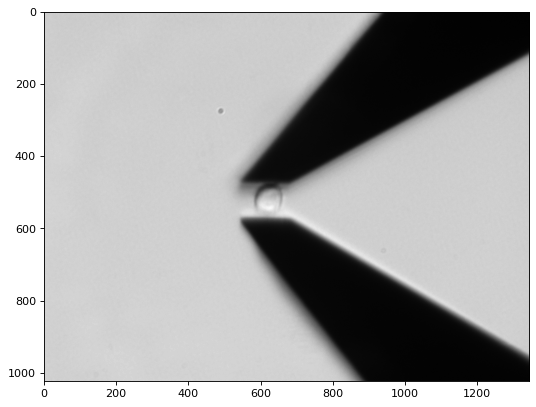

In [6]:

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image, cmap='gray');

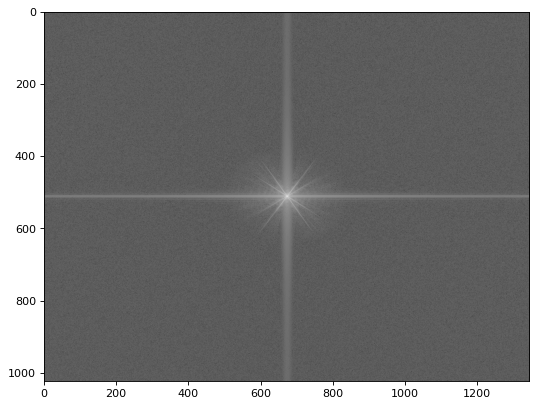

In [13]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

In [14]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image, 1)

ValueError: the input array must have size 3 along `channel_axis`, got (1024, 1344)

In [15]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size)
fourier_masker_hor(dark_image, 1)

ValueError: the input array must have size 3 along `channel_axis`, got (1024, 1344)

<h1>OPEN CV</h1> https://www.geeksforgeeks.org/how-to-find-the-fourier-transform-of-an-image-using-opencv-python/

In [21]:
import cv2
import numpy as np

# now we will be loading the image and converting it to grayscale
image = cv2.imread('../data_/Snail/Snail_sample_1/before comp 14.6μm 2.tif')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
cv2.imshow('Fourier Transform', magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'dft'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read the input image
# you can specify the path to image
image_path = "../data_/Snail/Snail_sample_1/before comp 14.6μm 2.tif"
image = cv2.imread(image_path, 0)

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'dft'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
# do fourrier transform of a .tiff image and display it
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

dark_image = imread('../data_/Snail/Snail_sample_1/before comp 14.6μm 2.tif')

